### Edgar Moises Hernandez-Gonzalez
#### 20/01/20-29/10/20
#### Espectrograma sin y con STFT de una señal de 4 segundos de EEG a 250Hz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [2]:
#canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[:, 7000:8000] #canal C3
canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[:, 11000:12000] #canal C4 (usar este)

In [3]:
# Señal EEG del sujeto 1
# 4 segundos con fs=250Hz

fs = 250
time = np.arange(0, 4, 1/fs)
sig = canal.iloc[2] #la muestra 2 es mano derecha
sig.shape

(1000,)

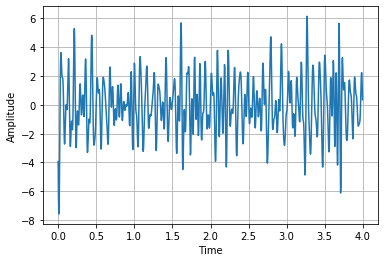

In [4]:
plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

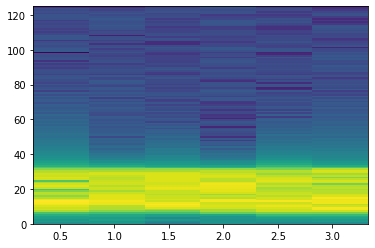

In [5]:
powerSpectrum, freqenciesFound, t, imageAxis = plt.specgram(sig, Fs=fs)
plt.show()

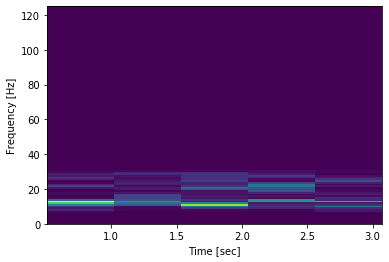

In [6]:
# Espectrograma con plt.specgram
plt.pcolormesh(t, freqenciesFound, powerSpectrum)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

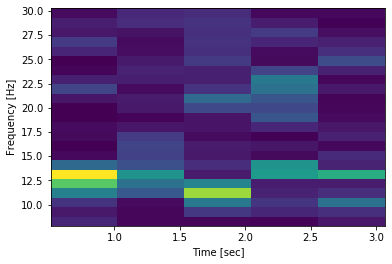

In [7]:
# Espectrograma con plt.specgram (Zoom)
plt.pcolormesh(t, freqenciesFound, powerSpectrum)
plt.axis([t[0], t[-1:], freqenciesFound[8], freqenciesFound[31]])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

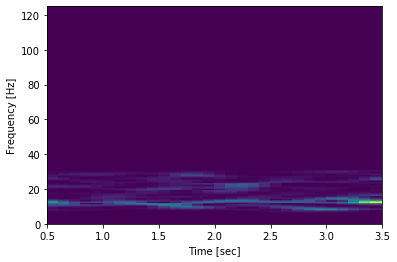

In [11]:
# Espectrograma con spectrogram, STFFT
#f, t, Sxx = spectrogram(sig, fs)
f, t, Sxx = spectrogram(sig, fs, window='hann', nperseg=250, noverlap=225, nfft=500, scaling='spectrum')
plt.pcolormesh(t, f, Sxx)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [12]:
# indices de f donde estan las frecuencias 8-30Hz
#print(f[8])
#print(f[31])
print(f[16])
print(f[60])

8.0
30.0


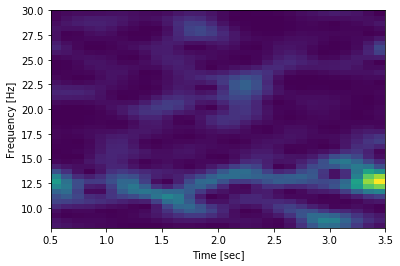

In [13]:
# Espectrograma con spectrogram, STFFT (Zoom)
plt.pcolormesh(t, f, Sxx)
#plt.axis([t[0], t[-1:], f[8], f[31]])
plt.axis([t[0], t[-1:], f[16], f[60]])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [14]:
print("plt.specgram:", powerSpectrum.shape)
print("signal.spectrogram", Sxx.shape)

plt.specgram: (129, 6)
signal.spectrogram (251, 31)


plt.specgram
(24, 6)


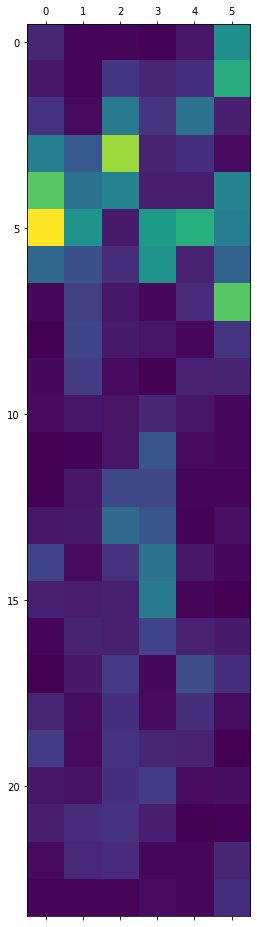

In [17]:
print("plt.specgram")
x2 = powerSpectrum[8:32, :]
print(x2.shape)
plt.matshow(x2)
plt.show()

signal.spectrogram
(45, 31)


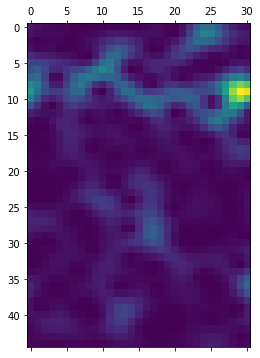

In [18]:
print("signal.spectrogram")
x = Sxx[16:61, :]
print(x.shape)
plt.matshow(x)
plt.show()